In [30]:
!pip install rdkit-pypi
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [56]:
import pandas as pd
import numpy as py
import seaborn as sb
from scipy import stats
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors 
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

import warnings
warnings.filterwarnings("ignore")

In [54]:
dataset = PandasTools.LoadSDF(r"C:\Users\sneha\Desktop\Comp Chem\vscode\HMG_CoA_ChEMBL_Database.sdf")
dataset.head()

[16:15:46] skipping block at line 182674: 'BEGIN BOND'
[16:15:46] skipping block at line 182708: 'BEGIN BOND'
[16:15:47] skipping block at line 198422: 'BEGIN BOND'
[16:15:47] skipping block at line 198450: 'BEGIN BOND'


,Target_Name,Target_Organism,Total_Molweight,Smiles,ID,ROMol
0,HMG-CoA reductase,Homo sapiens,292.139,Brc(c1nccnc1cc1)c1NC1=NCCN1,Compound 1,<rdkit.Chem.rdchem.Mol object at 0x0000018BE98...
1,HMG-CoA reductase,Homo sapiens,292.139,Brc(c1nccnc1cc1)c1NC1=NCCN1,Compound 2,<rdkit.Chem.rdchem.Mol object at 0x0000018BE99...
2,HMG-CoA reductase,Homo sapiens,157.01,Brc1ccccc1,Compound 3,<rdkit.Chem.rdchem.Mol object at 0x0000018BE99...
3,HMG-CoA reductase,Homo sapiens,157.01,Brc1ccccc1,Compound 4,<rdkit.Chem.rdchem.Mol object at 0x0000018BE99...
4,HMG-CoA reductase,Homo sapiens,368.522,C(/C=C/c1ccccc1)N(CC1)CCN1C(c1ccccc1)c1ccccc1,Compound 5,<rdkit.Chem.rdchem.Mol object at 0x0000018BE99...


In [6]:
len(dataset)

2430

In [15]:
duplicates_smiles = dataset[dataset['Smiles'].duplicated()]['Smiles'].values
len(duplicates_smiles)

1148

In [16]:
dataset[dataset['Smiles'].isin(duplicates_smiles)].sort_values(by=['Smiles'])

,Target_Name,Target_Organism,Total_Molweight,Smiles,ID,ROMol
0,HMG-CoA reductase,Homo sapiens,292.139,Brc(c1nccnc1cc1)c1NC1=NCCN1,Compound 1,<rdkit.Chem.rdchem.Mol object at 0x0000018BD8C...
1,HMG-CoA reductase,Homo sapiens,292.139,Brc(c1nccnc1cc1)c1NC1=NCCN1,Compound 2,<rdkit.Chem.rdchem.Mol object at 0x0000018BD8C...
2,HMG-CoA reductase,Homo sapiens,157.01,Brc1ccccc1,Compound 3,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
3,HMG-CoA reductase,Homo sapiens,157.01,Brc1ccccc1,Compound 4,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
4,HMG-CoA reductase,Homo sapiens,368.522,C(/C=C/c1ccccc1)N(CC1)CCN1C(c1ccccc1)c1ccccc1,Compound 5,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
...,...,...,...,...,...,...
2425,HMG-CoA reductase,Homo sapiens,201.253,c1c(-c2nc(cccc3)c3[nH]2)ncs1,Compound 2426,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2426,HMG-CoA reductase,Homo sapiens,252.315,c1cc2c(cccc3ccc4ccc5)c3c4c5c2cc1,Compound 2427,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2427,HMG-CoA reductase,Homo sapiens,252.315,c1cc2c(cccc3ccc4ccc5)c3c4c5c2cc1,Compound 2428,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2428,HMG-CoA reductase,Homo sapiens,252.315,c1cc2cc3ccc(cccc4cc5)c4c3c5c2cc1,Compound 2429,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...


In [17]:
dataset_new = dataset.drop_duplicates(subset=['Smiles'])
len(dataset_new)

1282

In [18]:
dataset_new

,Target_Name,Target_Organism,Total_Molweight,Smiles,ID,ROMol
0,HMG-CoA reductase,Homo sapiens,292.139,Brc(c1nccnc1cc1)c1NC1=NCCN1,Compound 1,<rdkit.Chem.rdchem.Mol object at 0x0000018BD8C...
2,HMG-CoA reductase,Homo sapiens,157.01,Brc1ccccc1,Compound 3,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
4,HMG-CoA reductase,Homo sapiens,368.522,C(/C=C/c1ccccc1)N(CC1)CCN1C(c1ccccc1)c1ccccc1,Compound 5,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
6,HMG-CoA reductase,Homo sapiens,277.494,C(C(C1CCCCC1)C1CCCCC1)C1NCCCC1,Compound 7,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
8,HMG-CoA reductase,Homo sapiens,234.385,C(CC1)C[C@H]2N1C[C@@H]1[C@H](CCCC3)N3C[C@H]2C1,Compound 9,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...
...,...,...,...,...,...,...
2420,HMG-CoA reductase,Homo sapiens,332.496,c(cc1)cc2c1sc(SSc1nc(cccc3)c3s1)n2,Compound 2421,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2422,HMG-CoA reductase,Homo sapiens,260.339,c(cc1)ccc1Nc(cc1)ccc1Nc1ccccc1,Compound 2423,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2424,HMG-CoA reductase,Homo sapiens,201.253,c1c(-c2nc(cccc3)c3[nH]2)ncs1,Compound 2425,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2426,HMG-CoA reductase,Homo sapiens,252.315,c1cc2c(cccc3ccc4ccc5)c3c4c5c2cc1,Compound 2427,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...


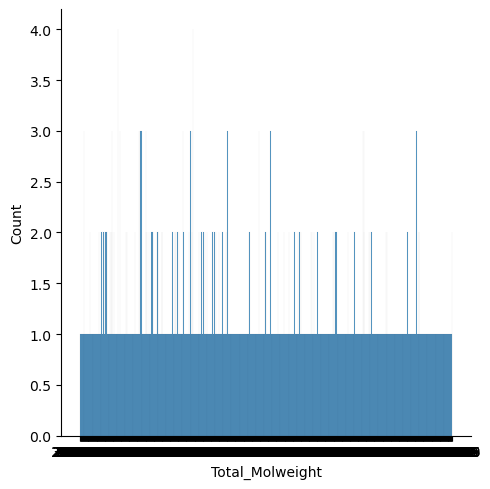

In [19]:
sb.displot(dataset_new.Total_Molweight)

In [20]:
dataset_new.Total_Molweight.describe()

count        1282
unique       1162
top       382.586
freq            4
Name: Total_Molweight, dtype: object

In [21]:
dataset2 = dataset_new.sort_values(['Total_Molweight'],
              ascending = [True])

dataset2

,Target_Name,Target_Organism,Total_Molweight,Smiles,ID,ROMol
1595,HMG-CoA reductase,Homo sapiens,1019.26,C[C@H]([C@H](CO)NC([C@H](CSSC[C@@H](C(N[C@@H](...,Compound 1596,<rdkit.Chem.rdchem.Mol object at 0x0000018BDF8...
992,HMG-CoA reductase,Homo sapiens,102.136,CCN(CC)N=O,Compound 993,<rdkit.Chem.rdchem.Mol object at 0x0000018BDE8...
2332,HMG-CoA reductase,Homo sapiens,108.14,OCc1ccccc1,Compound 2333,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
2098,HMG-CoA reductase,Homo sapiens,108.144,NNc1ccccc1,Compound 2099,<rdkit.Chem.rdchem.Mol object at 0x0000018BDF8...
2371,HMG-CoA reductase,Homo sapiens,110.112,Oc(cccc1)c1O,Compound 2372,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
...,...,...,...,...,...,...
425,HMG-CoA reductase,Homo sapiens,927.036,CC(C)c1c(C(Nc2ccccc2)=O)c(-c2ccccc2)c(-c(cc2)c...,Compound 426,<rdkit.Chem.rdchem.Mol object at 0x0000018BDE7...
1469,HMG-CoA reductase,Homo sapiens,934.166,C[C@@H]([C@@H]([C@@H](C)[C@@H](C1)O)O[C@@]1(CC...,Compound 1470,<rdkit.Chem.rdchem.Mol object at 0x0000018BDF8...
2381,HMG-CoA reductase,Homo sapiens,94.1126,Oc1ccccc1,Compound 2382,<rdkit.Chem.rdchem.Mol object at 0x0000018BE18...
26,HMG-CoA reductase,Homo sapiens,96.9439,C=C(Cl)Cl,Compound 27,<rdkit.Chem.rdchem.Mol object at 0x0000018BDD6...


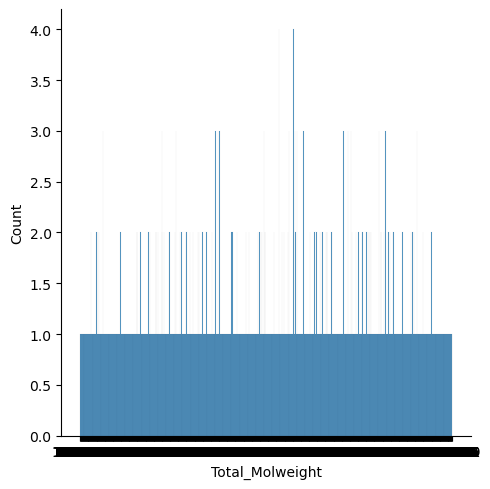

In [22]:
sb.displot(dataset2.Total_Molweight)

In [44]:
dataset2.Total_Molweight.describe()

count        1282
unique       1162
top       382.586
freq            4
Name: Total_Molweight, dtype: object

<Axes: >

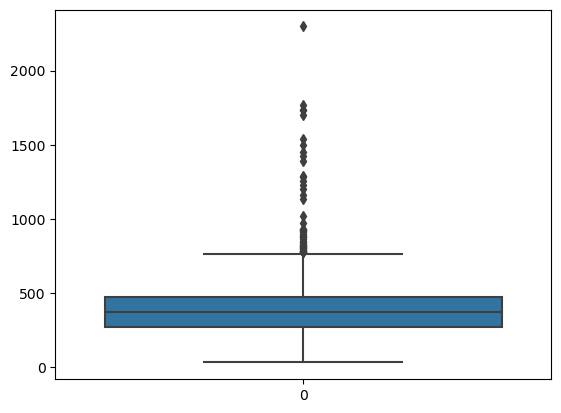

In [36]:
sb.boxplot(dataset2.Total_Molweight)

In [58]:
# median = py.median(dataset_new.Total_Molweight)

# print(median)